In [67]:
import pandas as pd
import numpy as np
from sklearn import (cluster,
                     metrics)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [68]:
warnings.filterwarnings('ignore')
%matplotlib inline

In [69]:
df = pd.read_csv('claster_data/pokemon.csv')
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


In [70]:
data = df.copy()

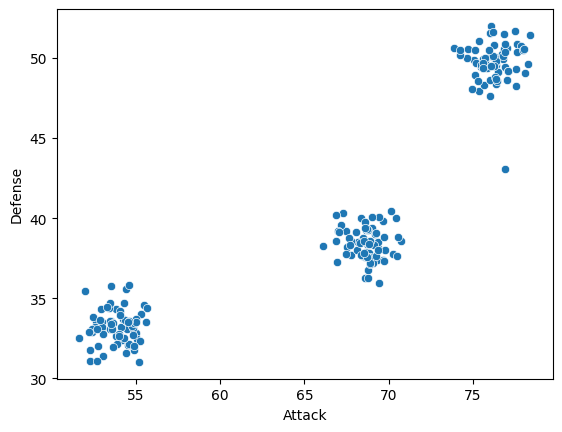

In [71]:
X = df[['Attack', 'Defense']]

sns.scatterplot(x=df['Attack'], y=df['Defense']);

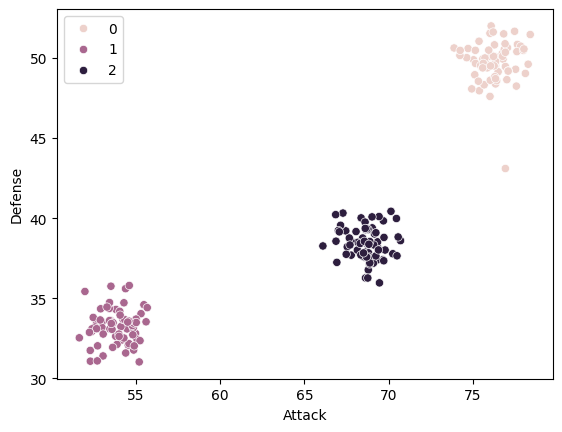

In [72]:
kmeans = cluster.KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    random_state=42
)
kmeans.fit(X)

predictions = kmeans.predict(X)
predictions = kmeans.labels_
df['Clusters_K3'] = predictions

sns.scatterplot(x=df['Attack'], y=df['Defense'], hue=predictions,);

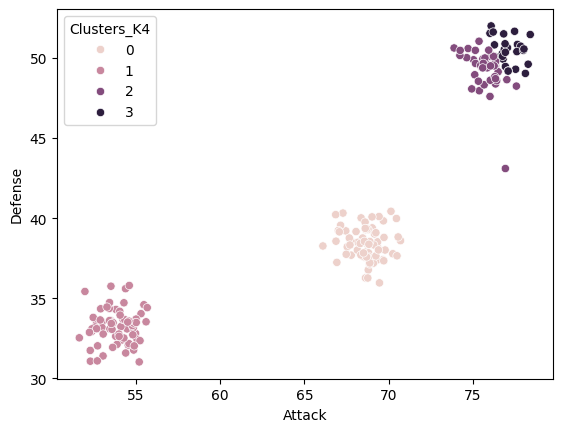

In [73]:
kmeans = cluster.KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    random_state=42
)
kmeans.fit(X)

predictions = kmeans.predict(X)
predictions = kmeans.labels_
df['Clusters_K4'] = predictions

sns.scatterplot(x=df['Attack'], y=df['Defense'], hue=df['Clusters_K4']);

In [74]:
X = df[['Attack', 'Defense', 'Speed']]

In [75]:
kmeans = cluster.KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    random_state=42
)
kmeans.fit(X)

predictions = kmeans.predict(X)
predictions = kmeans.labels_
df['Full_clusters'] = predictions
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters,Clusters_K3,Clusters_K4,Full_clusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2,0,3,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1,2,0,0
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2,0,2,0
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2,0,3,0
4,Charmander,309,39,68.658104,37.890027,60,50,65,1,2,0,0


## Подбор оптимального количества кластеров

### Метод локтя

In [76]:
def get_inertia(cluster_num, X):
    
    kmeans = cluster.KMeans(
        n_clusters=cluster_num,
        random_state=42
    )
    kmeans.fit(X)
    inertia = kmeans.inertia_
    
    return inertia

In [77]:
# X = data.drop('Name', axis=1)
X = df[['Attack', 'Defense']]

In [78]:
inertia = []
for cluster_num in range(1, 10):
  
    inertia.append(get_inertia(cluster_num=cluster_num, X=X))

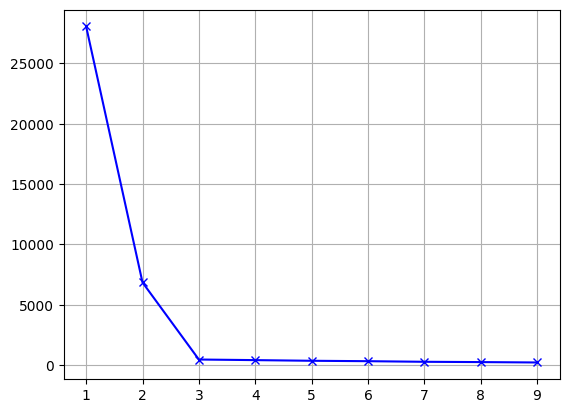

In [79]:
plt.plot(list(range(1, 10)), inertia, 'xb-')
plt.grid();

In [80]:
# # напишем функцию, как и при подсчете метода локтя
# def get_silhouette(cluster_num, X):
#     k_means =  cluster.KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
#     k_means.fit(X)
# # подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
#     silhouette = metrics.silhouette_score(X, k_means.predict(X))
#     return silhouette

# # создадим пустой словарь, ключами будут инерция и количество кластеров
# silhouette_res = {"silhouette": [], "cluster": []}

# # выберем нужные данные 
# X = df[['Attack', 'Defense']]

# for cluster_num in range(2, 10):
#     silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
#     silhouette_res["cluster"].append(cluster_num)

### Коэффициент силуета

In [81]:
X = data.drop('Name', axis=1)

In [82]:
def get_silhouette(cluster_num, X):
    
    kmeans = cluster.KMeans(
        n_clusters=cluster_num,
        init='k-means++',
        n_init=10,
        random_state=42
    )
    kmeans.fit(X)
    silhouette = metrics.silhouette_score(X, kmeans.predict(X))
    
    return silhouette

In [83]:
silhouette_res = {'silhouette' : [], 'num_cluster' : []}

for cluster_num in range(2, 10):
    
    silhouette_res['silhouette'].append(get_silhouette(cluster_num, X))
    silhouette_res['num_cluster'].append(cluster_num)

In [84]:
silhouette_df = pd.DataFrame(silhouette_res)
silhouette_df.head()

,silhouette,num_cluster
0,0.552846,2
1,0.428402,3
2,0.412198,4
3,0.392818,5
4,0.348973,6


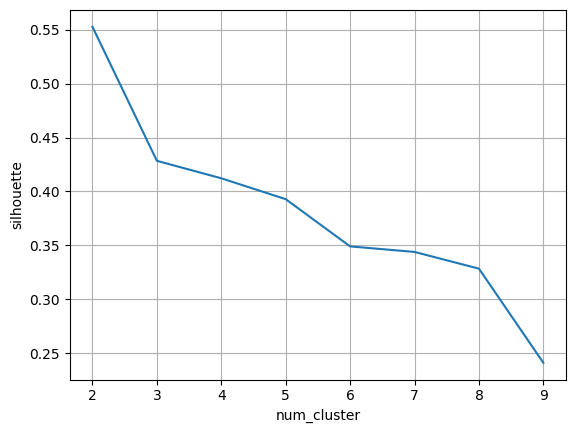

In [85]:
sns.lineplot(silhouette_df, x='num_cluster', y='silhouette')
plt.grid();

In [86]:
dbscan = cluster.DBSCAN(eps=3, min_samples=3).fit(df[['Attack', 'Defense']])

In [87]:
cl_lb = dbscan.labels_
list(set(cl_lb))

[0, 1, 2, -1]

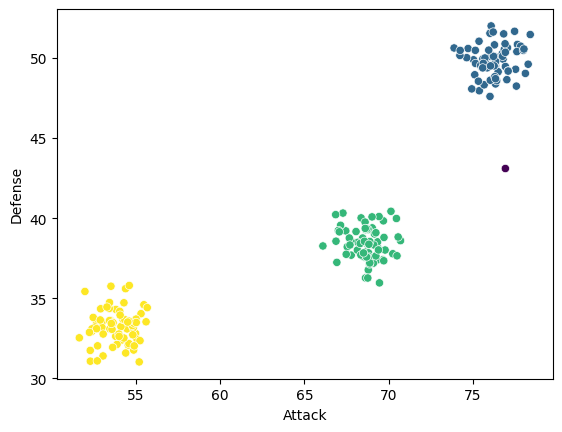

In [90]:
sns.scatterplot(x=df['Attack'], y=df['Defense'], c=cl_lb);